# Exploratory Data Analysis (EDA) on Diabetic Patients Data

This data will be used to analyze factors readmission as well as other outcomes pertaining to patients with diabetes.

This dataset contains 10 years(1999-2008) of data of clinical care at 130 US hospitals. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1) It is an inpatient encounter (a hospital admission).

(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.

(3) The length of stay was at least 1 day and at most 14 days.

(4) Laboratory tests were performed during the encounter.

(5) Medications were administered during the encounter.



The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.



Source of the dataset: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

Citation: Clore,John, Cios,Krzysztof, DeShazo,Jon, and Strack,Beata. (2014). Diabetes 130-US hospitals for years 1999-2008. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J. 

I wanted to perform EDA mainly on two areas which was Credit card payments and other related to Health-care problems. So, I discovered various datasets on credit card payments and also found many EDA projects related to it so I decided to find a dataset related to healthcare and found diabetes dataset from UC, Irvine’s data.



This dataset is legal and free to download [https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip].

This dataset has 70000 records[rows] and 47 features[columns] and contains information about the age, gender, and race of the patients. 

Through this project I would Perform EDA on this dataset and will try to find some insights and provide visualizations to depict insights. 

In [1]:
import numpy as np
import pandas as pd

import random # random library
# for selecting ramdom theme
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']

import matplotlib.pyplot as plt
!matplotlib inline

import plotly.express as px #for plots
import seaborn as sns


Traceback (most recent call last):
  File "C:\Users\deepk\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
             ^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [2]:
data = pd.read_csv("diabetic_data.csv")
data.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

# Exploration and cleanup

In [3]:
data.info() # gives the info of the entities/columns in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_


# Dealing with missing and zero values


In [4]:
# if the data uses/have '?' for missing values then we can replace it with NaN
data.replace('?', np.NaN, inplace=True)

#using isnull function
print(data.isnull().any().sum())    # print how many columns have missing values 
print(data.isnull().sum())          # print number of missing values in each column


7
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamid

From above data we can say that column named: weight has 98569 missing entries; payer_code has 40256 missing entries; medical_specialty has 49949 missing entries

So these three columns have >50% missing values, so I will be dropping these 3 columns

In [5]:
data = data.drop('weight', axis=1)
data = data.drop('payer_code', axis=1)
data = data.drop('medical_specialty', axis=1)
data = data.drop('encounter_id', axis=1)
data = data.drop('admission_type_id', axis=1)
data = data.drop('discharge_disposition_id', axis=1)
data = data.drop('admission_source_id', axis=1)
data = data.drop('diag_1', axis=1)
data = data.drop('diag_2', axis=1)
data = data.drop('diag_3', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      99493 non-null   object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   time_in_hospital          101766 non-null  int64 
 5   num_lab_procedures        101766 non-null  int64 
 6   num_procedures            101766 non-null  int64 
 7   num_medications           101766 non-null  int64 
 8   number_outpatient         101766 non-null  int64 
 9   number_emergency          101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  number_diagnoses          101766 non-null  int64 
 12  max_glu_serum             101766 non-null  object
 13  A1Cresult                 101766 non-null  object
 14  metf

In [7]:
# drop all the rows that contains missing values
data = data.dropna()
data.shape
data

patient_nbr             race  gender      age  time_in_hospital  \
0           8222157        Caucasian  Female   [0-10)                 1   
1          55629189        Caucasian  Female  [10-20)                 3   
2          86047875  AfricanAmerican  Female  [20-30)                 2   
3          82442376        Caucasian    Male  [30-40)                 2   
4          42519267        Caucasian    Male  [40-50)                 1   
...             ...              ...     ...      ...               ...   
101761    100162476  AfricanAmerican    Male  [70-80)                 3   
101762     74694222  AfricanAmerican  Female  [80-90)                 5   
101763     41088789        Caucasian    Male  [70-80)                 1   
101764     31693671        Caucasian  Female  [80-90)                10   
101765    175429310        Caucasian    Male  [70-80)                 6   

        num_lab_procedures  num_procedures  num_medications  \
0                       41               0                1   
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  ...  citoglipton  insulin  \
0                       0                 0  ...           No       No   
1                       0                 0  ...           No       Up   
2                       2                 0  ...           No       No   
3                       0                 0  ...           No       Up   
4                       0                 0  ...           No   Steady   
...                   ...               ...  ...          ...      ...   
101761                  0                 0  ...           No     Down   
101762                  0                 0  ...           No   Steady   
101763                  1                 0  ...           No     Down   
101764                  0                 0  ...           No       Up   
101765                  0                 0  ...           No       No   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                       No                  No                       No   
1                       No                  No                       No   
2                       No                  No                       No   
3                       No                  No                       No   
4                       No                  No                       No   
...                    ...                 ...                      ...   
101761                  No                  No                       No   
101762                  No                  No                       No   
101763                  No                  No                       No   
101764                  No                  No                       No   
101765                  No                  No                       No   

       metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
0                           No                     No     No          No   
1                           No                     No     Ch         Yes   
2                           No                     No     No         Yes   
3                           No                     No     Ch         Yes   
4                           No                     No     Ch         Yes   
...                        ...                    ...    ...         ...   
101761                      

In [8]:
data.groupby('insulin').size()  # number of records in insulin based on categories

insulin
Down      12039
No        46496
Steady    29902
Up        11056
dtype: int64

# Converting the data into numeric form for EDA

In [9]:
data.loc[data['max_glu_serum'] == '>300','max_glu_serum'] = int(3)
data.loc[data['max_glu_serum'] == '>200','max_glu_serum'] = int(2)
data.loc[data['max_glu_serum'] == 'Norm','max_glu_serum'] = int(1)
data.loc[data['max_glu_serum'] == 'None','max_glu_serum'] = int(0)

data['max_glu_serum'] = data['max_glu_serum'].astype(int)

data.loc[data['A1Cresult'] == '>7','A1Cresult'] = int(1)
data.loc[data['A1Cresult'] == '>8','A1Cresult'] = int(1)
data.loc[data['A1Cresult'] == 'None','A1Cresult'] = int(0)
data.loc[data['A1Cresult'] == 'Norm','A1Cresult'] = int(-1)

data['A1Cresult'] = data['A1Cresult'].astype(int)

data.loc[data['change'] == 'Ch','change'] = int(1)
data.loc[data['change'] == 'No','change'] = int(0)
data['change'] = data['change'].astype(int)

data.loc[data['diabetesMed'] == 'Yes','diabetesMed'] = int(1)
data.loc[data['diabetesMed'] == 'No','diabetesMed'] = int(0)
data['diabetesMed'] = data['diabetesMed'].astype(int)

data.loc[data['readmitted'] == '>30','readmitted'] = int(1)
data.loc[data['readmitted'] == '<30','readmitted'] = int(-1)
data.loc[data['readmitted'] == 'NO','readmitted'] = int(0)
data['readmitted'] = data['readmitted'].astype(int)
data['A1Cresult'] = data['A1Cresult'].astype(int)
 
lst = ['metformin', 'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for clm_name in lst:
    data.loc[data[clm_name] == 'Down',clm_name] = int(-1)
    data.loc[data[clm_name] == 'No',clm_name] = int(0)
    data.loc[data[clm_name] == 'Steady',clm_name] = int(1)
    data.loc[data[clm_name] == 'Up',clm_name] = int(2)
    
    data[clm_name] = data[clm_name].astype(int)

data

patient_nbr             race  gender      age  time_in_hospital  \
0           8222157        Caucasian  Female   [0-10)                 1   
1          55629189        Caucasian  Female  [10-20)                 3   
2          86047875  AfricanAmerican  Female  [20-30)                 2   
3          82442376        Caucasian    Male  [30-40)                 2   
4          42519267        Caucasian    Male  [40-50)                 1   
...             ...              ...     ...      ...               ...   
101761    100162476  AfricanAmerican    Male  [70-80)                 3   
101762     74694222  AfricanAmerican  Female  [80-90)                 5   
101763     41088789        Caucasian    Male  [70-80)                 1   
101764     31693671        Caucasian  Female  [80-90)                10   
101765    175429310        Caucasian    Male  [70-80)                 6   

        num_lab_procedures  num_procedures  num_medications  \
0                       41               0                1   
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  ...  citoglipton  insulin  \
0                       0                 0  ...            0        0   
1                       0                 0  ...            0        2   
2                       2                 0  ...            0        0   
3                       0                 0  ...            0        2   
4                       0                 0  ...            0        1   
...                   ...               ...  ...          ...      ...   
101761                  0                 0  ...            0       -1   
101762                  0                 0  ...            0        1   
101763                  1                 0  ...            0       -1   
101764                  0                 0  ...            0        2   
101765                  0                 0  ...            0        0   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                         0                    0                         0   
1                         0                    0                         0   
2                         0                    0                         0   
3                         0                    0                         0   
4                         0                    0                         0   
...                     ...                  ...                       ...   
101761                    0                    0                         0   
101762                    0                    0                         0   
101763                    0                    0                         0   
101764                    0                    0                         0   
101765                    0                    0                         0   

        metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
0                             0                       0       0            0   
1                             0                       0       1            1   
2                             0                       0       0            1   
3                             0                       0       1            1   
4                             0                       0       1            1   
...                         ...             

In [10]:
data['A1Cresult']

0         0
1         0
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: A1Cresult, Length: 99493, dtype: int32

In [11]:
data.describe()   # gives the statistical numeric summary of all the numeric columns

patient_nbr  time_in_hospital  num_lab_procedures  num_procedures  \
count  9.949300e+04      99493.000000        99493.000000    99493.000000   
mean   5.456413e+07          4.398420           43.072588        1.340577   
std    3.866461e+07          2.986977           19.695858        1.703717   
min    1.350000e+02          1.000000            1.000000        0.000000   
25%    2.346008e+07          2.000000           31.000000        0.000000   
50%    4.598436e+07          4.000000           44.000000        1.000000   
75%    8.779702e+07          6.000000           57.000000        2.000000   
max    1.895026e+08         14.000000          132.000000        6.000000   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
count     99493.000000       99493.000000      99493.000000      99493.000000   
mean         16.026605           0.373353          0.201341          0.643101   
std           8.119790           1.276799          0.939977          1.271365   
min           1.000000           0.000000          0.000000          0.000000   
25%          10.000000           0.000000          0.000000          0.000000   
50%          15.000000           0.000000          0.000000          0.000000   
75%          20.000000           0.000000          0.000000          1.000000   
max          81.000000          42.000000         76.000000         21.000000   

       number_diagnoses  max_glu_serum  ...  citoglipton       insulin  \
count      99493.000000   99493.000000  ...      99493.0  99493.000000   
mean           7.439217       0.093092  ...          0.0      0.401787   
std            1.926064       0.435270  ...          0.0      0.839414   
min            1.000000       0.000000  ...          0.0     -1.000000   
25%            6.000000       0.000000  ...          0.0      0.000000   
50%            8.000000       0.000000  ...          0.0      0.000000   
75%            9.000000       0.000000  ...          0.0      1.000000   
max           16.000000       3.000000  ...          0.0      2.000000   

       glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
count         99493.000000         99493.000000               99493.00000   
mean              0.006835             0.000131                   0.00001   
std               0.083480             0.011430                   0.00317   
min              -1.000000             0.000000                   0.00000   
25%               0.000000             0.000000                   0.00000   
50%               0.000000             0.000000                   0.00000   
75%               0.000000             0.000000                   0.00000   
max               2.000000             1.000000                   1.00000   

       metformin-rosiglitazone  metformin-pioglitazone        change  \
count                  99493.0             99493.00000  99493.000000   
mean                       0.0                 0.00001      0.461450   
std                        0.0                 0.00317      0.498514   
min                        0.0                 0.00000      0.000000   
25%                        0.0                 0.00000      0.000000   
50%                        0.0                 0.00000      0.000000   
75%                        0.0                 0.00000      1.000000   
max                        0.0                 1.00000      1.000000   

        diabetesMed    readmitted  
count  99493.000000  99493.000000  
mean       0.768818      0.239595  
std        0.421591      0.637739  
min        0.000000     -1.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 37 columns]

# Visualizing the Data

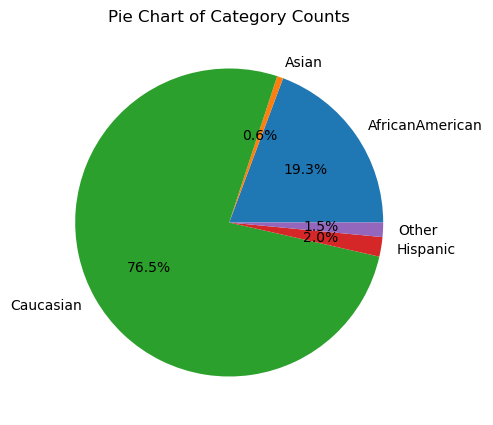

In [12]:
race_data = dict(data.groupby('race').size())
race_data
plt.figure(figsize=(5, 5))
plt.pie(race_data.values(), labels=race_data.keys(), autopct='%1.1f%%')
plt.title('Pie Chart of Category Counts')
plt.show()


This data can be used for prediction of wheather the patients needs to be readmitted or not


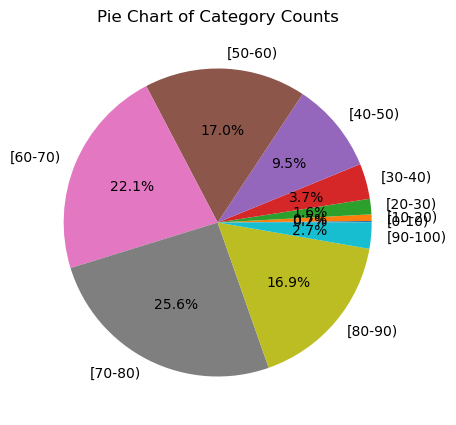

In [13]:
#data.groupby('age').size()
age_data = dict(data.groupby('age').size())
age_data
plt.figure(figsize=(5, 5))
plt.pie(age_data.values(), labels=age_data.keys(), autopct='%1.1f%%')
plt.title('Pie Chart of Category Counts')
plt.show()

In [14]:
px.pie(data, names="readmitted") 

Blue: Not readmitted;
Red: Readmitted >30 days;
Green: Readmitted <30 days

# Insulin v/s readmitted

<Axes: xlabel='insulin', ylabel='count'>

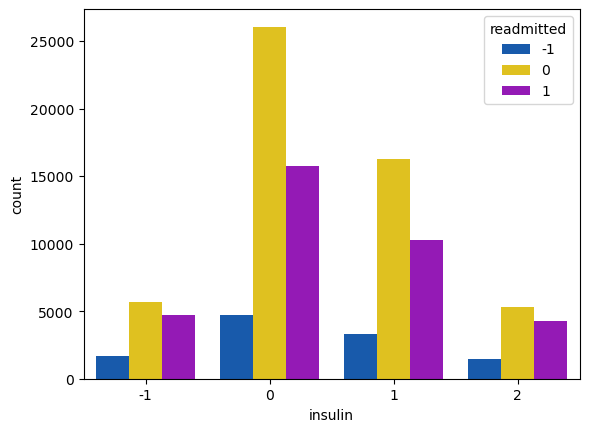

In [15]:
sns.countplot(x="insulin", hue = "readmitted", data=data, palette=random.choice(pallete))

# Insulin v/s diabetesMed

<Axes: xlabel='insulin', ylabel='Count'>

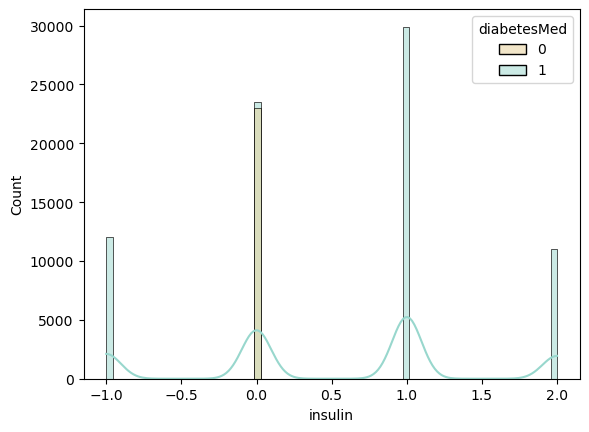

In [19]:
sns.histplot(x="insulin", hue="diabetesMed", data=data, kde=True, palette=random.choice(pallete))

# Number of Diagnoses v/s readmitted

<Axes: xlabel='number_diagnoses', ylabel='Count'>

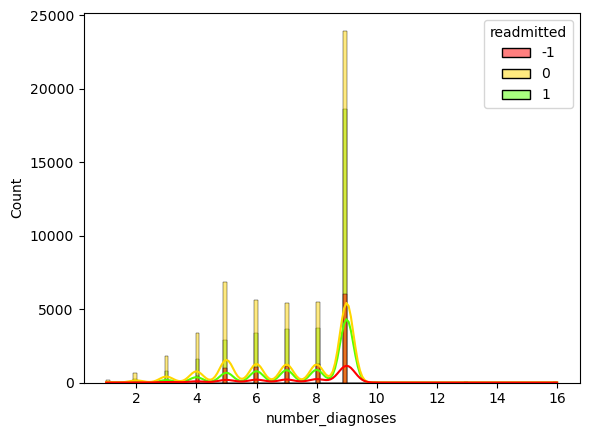

In [34]:
sns.histplot(x="number_diagnoses", hue="readmitted", data=data, kde=True, palette=random.choice(pallete))

# Age v/s readmitted

<Axes: xlabel='age', ylabel='Count'>

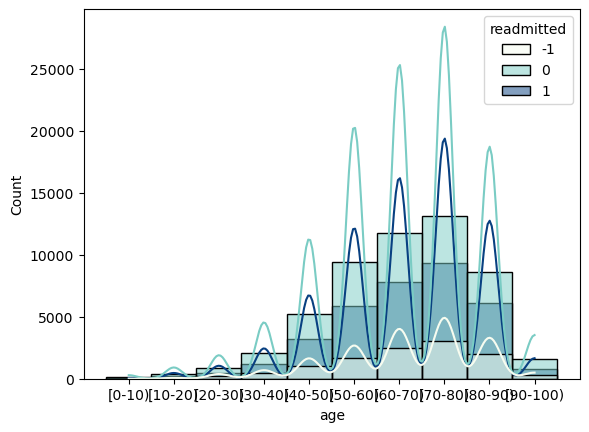

In [27]:
sns.histplot(x="age", hue="readmitted", data=data, kde=True, palette=random.choice(pallete))

In [14]:
#Correlation 

data.corr() # gives as an idea how columns/entities of the dataset is related to each other.

C:\Users\deepk\AppData\Local\Temp\ipykernel_11448\156607039.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


patient_nbr  time_in_hospital  num_lab_procedures  \
patient_nbr                  1.000000         -0.025935            0.014934   
time_in_hospital            -0.025935          1.000000            0.317671   
num_lab_procedures           0.014934          0.317671            1.000000   
num_procedures              -0.019005          0.193234            0.058407   
num_medications              0.015870          0.466381            0.266993   
number_outpatient            0.102738         -0.009542           -0.008556   
number_emergency             0.061517         -0.009799           -0.002227   
number_inpatient             0.011226          0.073408            0.039739   
number_diagnoses             0.219875          0.220687            0.151594   
max_glu_serum               -0.078679          0.027876           -0.128900   
A1Cresult                   -0.034983          0.017008            0.099655   
metformin                    0.010443         -0.004931           -0.042261   
repaglinide                  0.050253          0.031178            0.013835   
nateglinide                  0.019690          0.004477           -0.005468   
chlorpropamide              -0.012008          0.003928           -0.000372   
glimepiride                  0.022837          0.011336           -0.001148   
acetohexamide               -0.002713          0.010191            0.004012   
glipizide                    0.003734          0.011675            0.009340   
glyburide                   -0.043749          0.017080           -0.005274   
tolbutamide                 -0.003306          0.002769            0.000082   
pioglitazone                 0.037417          0.005870           -0.014318   
rosiglitazone               -0.006430          0.006870           -0.008175   
acarbose                     0.009984          0.005838           -0.000418   
miglitol                     0.006350          0.003528           -0.002965   
troglitazone                -0.002017          0.003557            0.003790   
tolazamide                  -0.015046         -0.003266           -0.000445   
examide                           NaN               NaN                 NaN   
citoglipton                       NaN               NaN                 NaN   
insulin                      0.002137          0.046121            0.034222   
glyburide-metformin          0.029694         -0.001892           -0.010064   
glipizide-metformin         -0.003663         -0.000642           -0.007587   
glimepiride-pioglitazone    -0.001082         -0.002546           -0.000817   
metformin-rosiglitazone           NaN               NaN                 NaN   
metformin-pioglitazone      -0.001084          0.001700           -0.003231   
change                       0.054383          0.107913            0.062720   
diabetesMed                  0.018988          0.061810            0.032150   
readmitted                   0.048595         -0.004013            0.010008   

                          num_procedures  num_medications  number_outpatient  \
patient_nbr                    -0.019005         0.015870           0.102738   
time_in_hospital                0.193234         0.466381          -0.009542   
num_lab_procedures              0.058407         0.266993          -0.008556   
num_procedures                  1.000000         0.385538          -0.024937   
num_medications                 0.385538         1.000000           0.044528   
number_outpatient              -0.024937         0.044528           1.000000   
number_emergency               -0.038369         0.012964           0.090941   
number_inpatient               -0.065843         0.064993           0.106236   
number_diagnoses                0.072339         0.258605           0.092458   
max_glu_serum                  -0.069956        -0.000769           0.047511   
A1Cresult                      -0.002639         0.003263          -0.001986   
metformin                      -0.037016         0.059854      

Text(0.5, 1.0, 'Correlation Map')

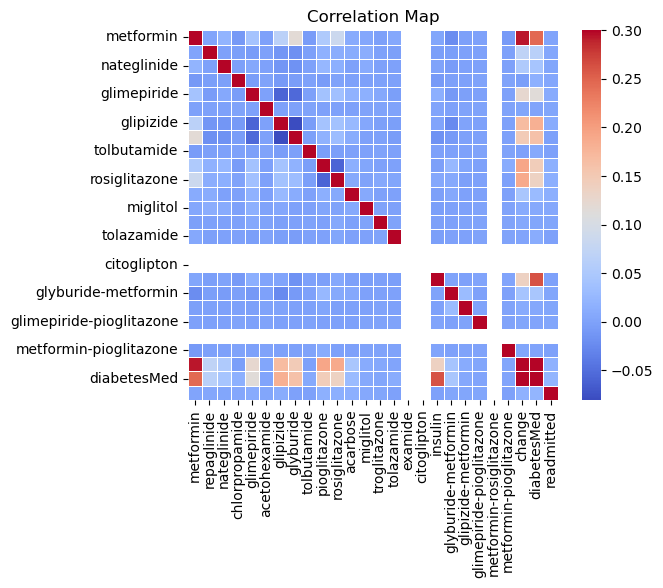

In [35]:
#Correlation plot
lst = ['metformin', 'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted']
sns.heatmap(data[lst].corr(), linewidths=0.5, vmax=0.3, square=True, cmap='coolwarm', linecolor='white').set_title("Correlation Map")

# Glipizide dosage v/s Glyburide dosage

<Axes: xlabel='glipizide', ylabel='Count'>

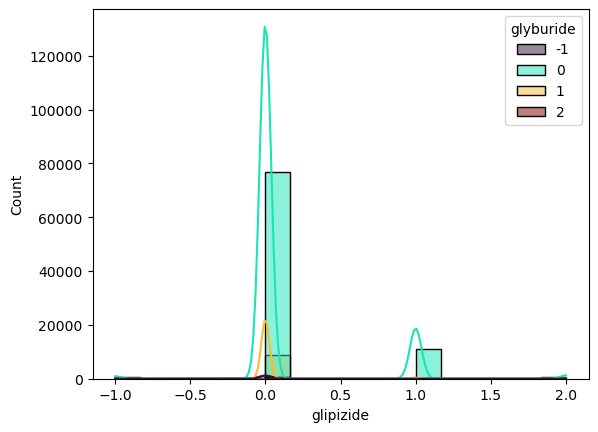

In [28]:
sns.histplot(x="glipizide", hue="glyburide", data=data, kde=True, palette=random.choice(pallete))

# Metformin dosage v/s Diabetes Medicine priscription

<Axes: xlabel='metformin', ylabel='Count'>

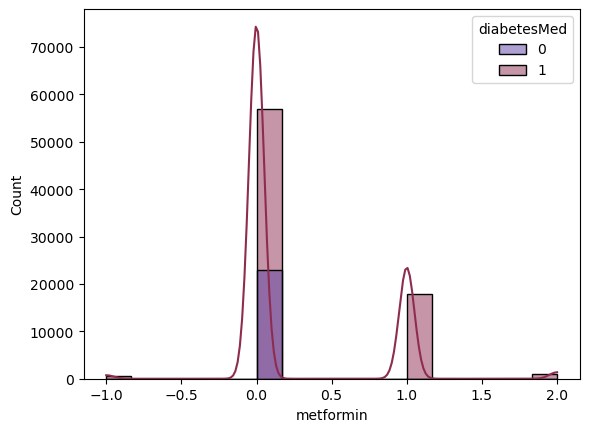

In [32]:
sns.histplot(x="metformin", hue="diabetesMed", data=data, kde=True, palette=random.choice(pallete))

# Change in diabetic medication v/s Diabetes Medicine priscription

<Axes: xlabel='change', ylabel='Count'>

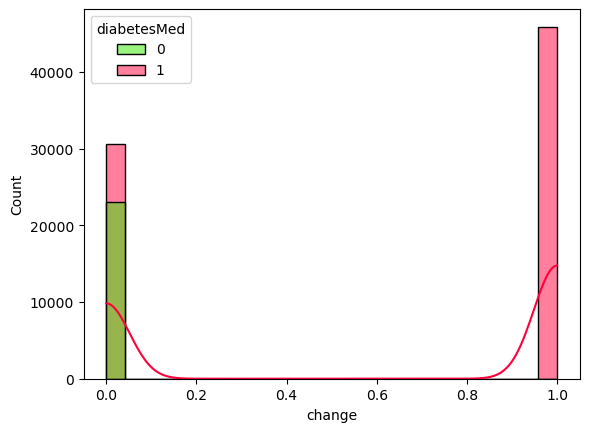

In [52]:
sns.histplot(x="change", hue="diabetesMed", data=data, kde=True, palette=random.choice(pallete))

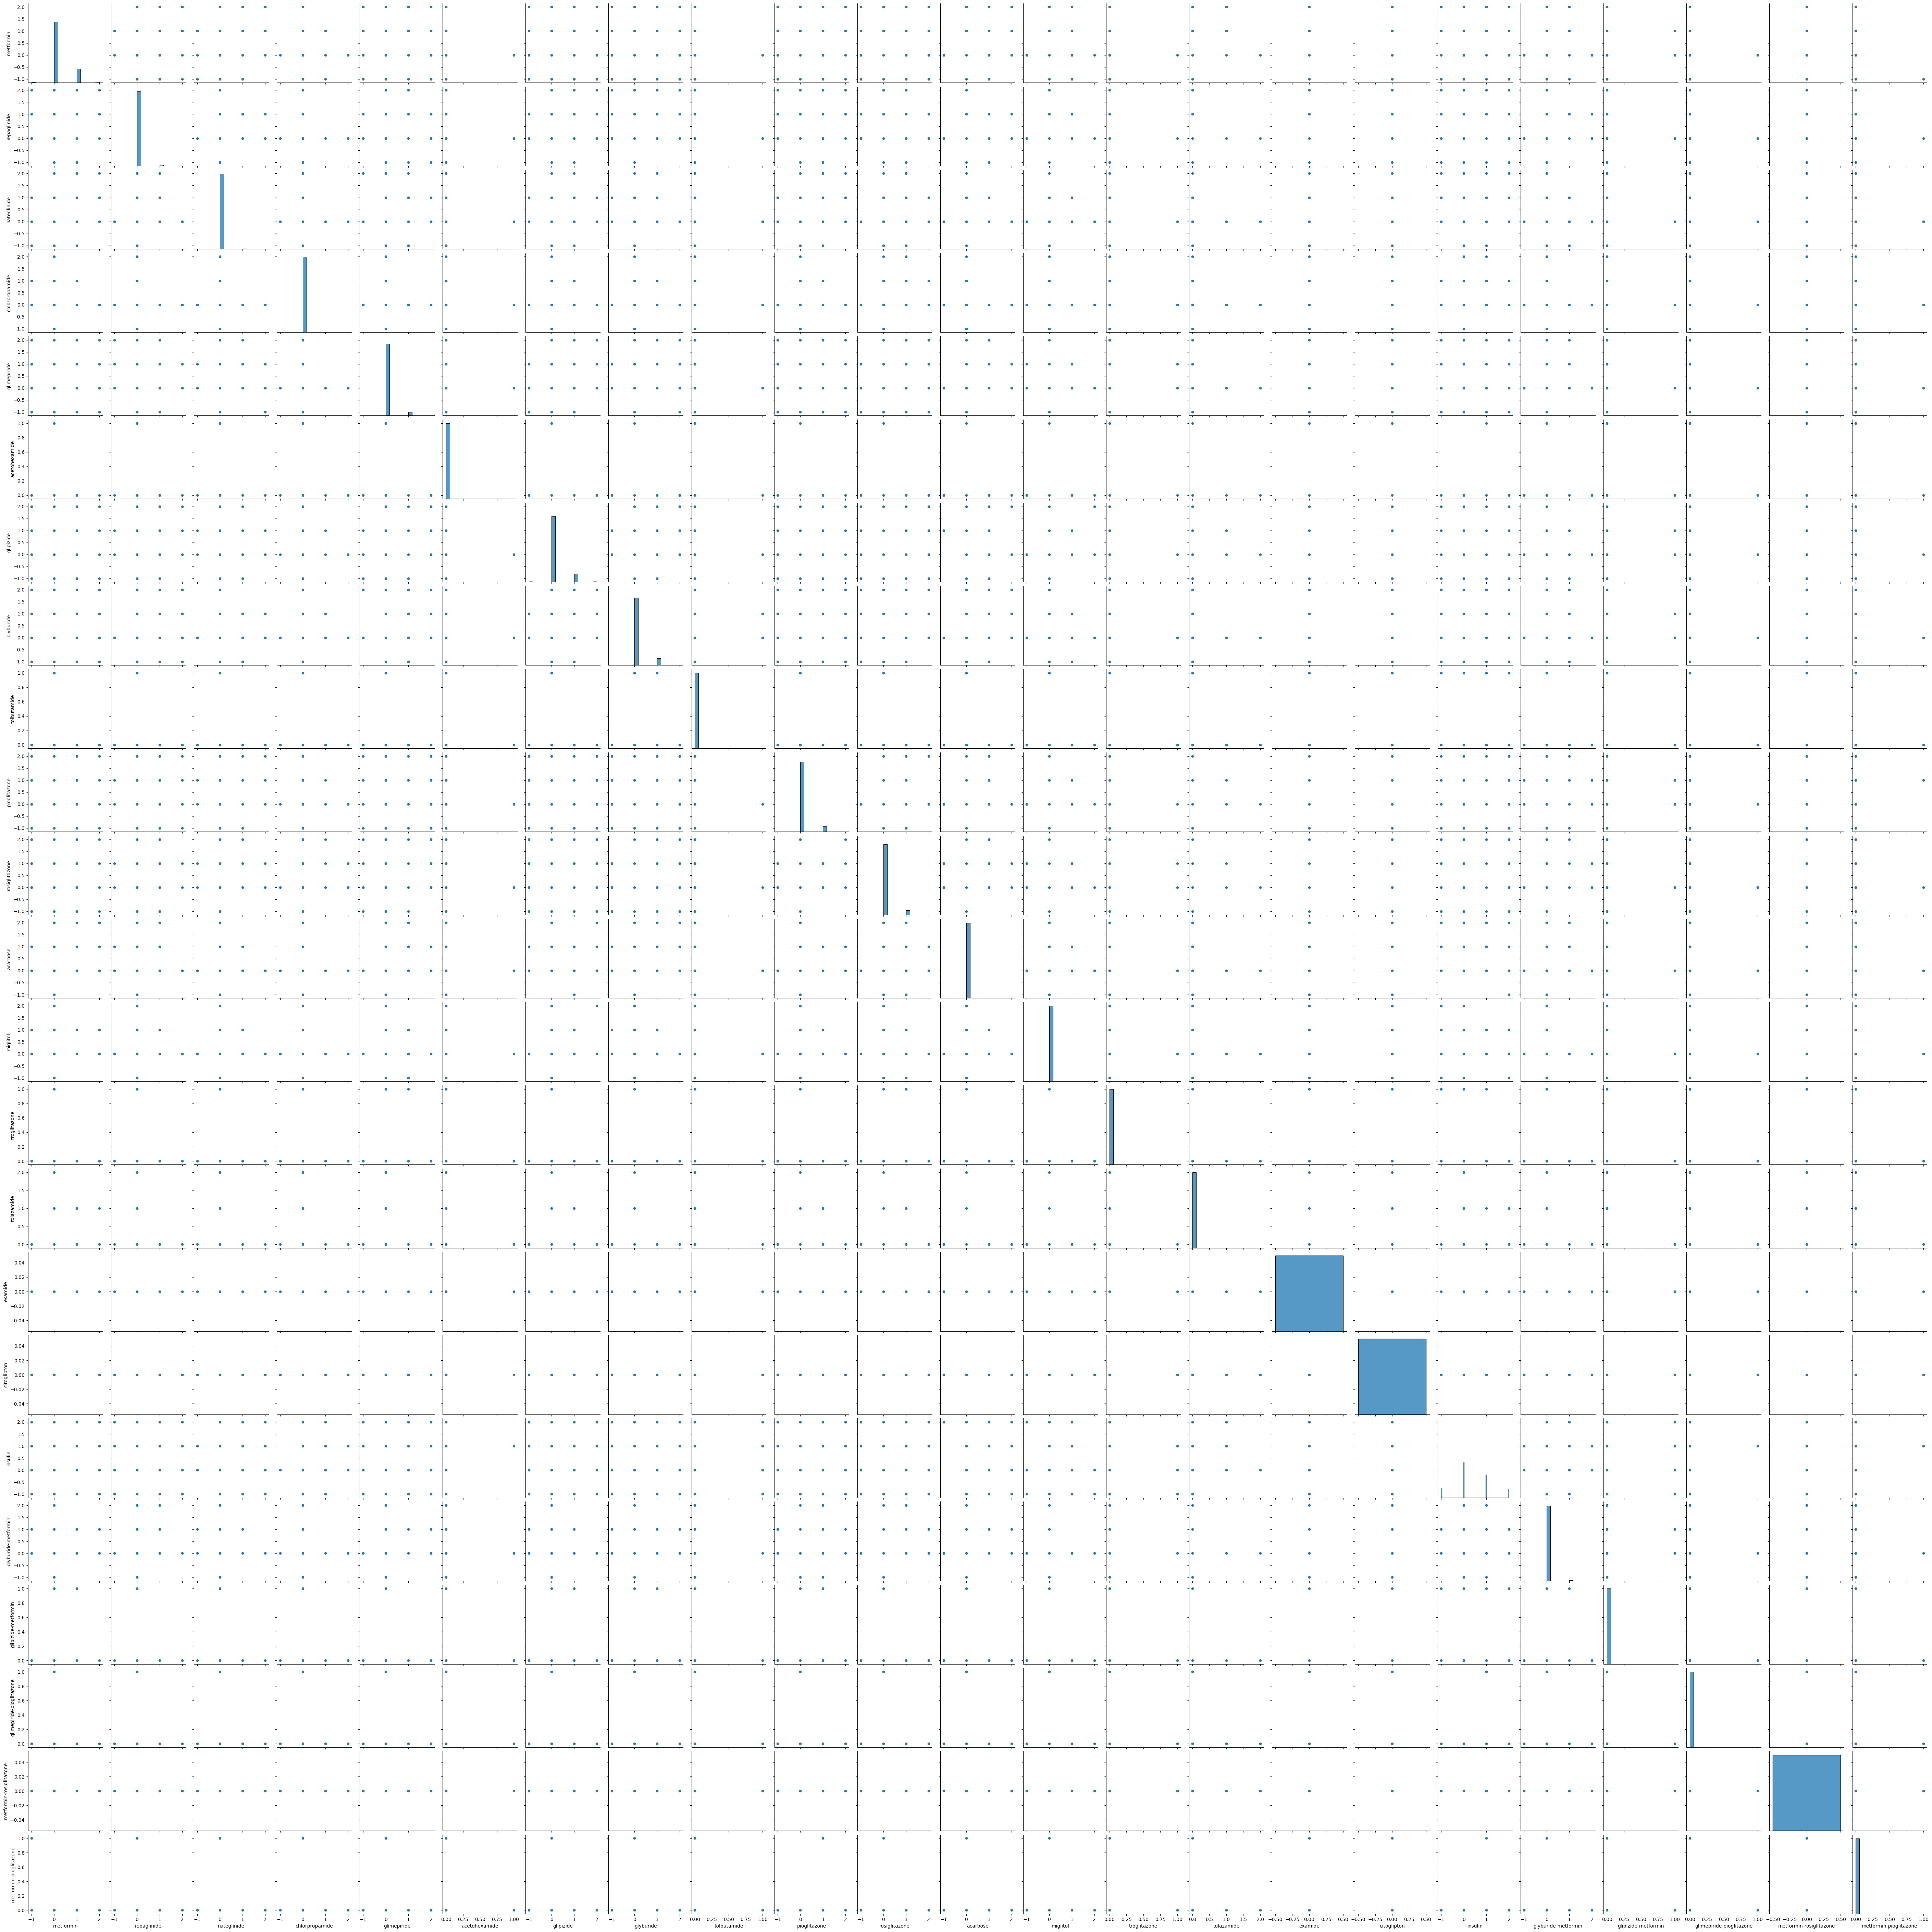

In [21]:
sns.pairplot(data[lst])